# 🔍 Customer Churn — Exploratory Data Analysis (EDA)

## Project Objective
This notebook explores the cleaned customer churn dataset to understand:
- Data distribution
- Relationships between features
- Patterns related to customer churn

Insights from this analysis will support feature selection
and model improvement in later stages.

## 1️⃣ Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

## 2️⃣ Load Cleaned Dataset

In [2]:
df = pd.read_csv("../data/cleaned_data.csv")

## 3️⃣ Initial Dataset Overview

In [3]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [4]:
df.shape

(200, 28)

**Insight:**  
The dataset contains **200 observations** and **28 numerical features**.

## 4️⃣ Target Variable Analysis (Churn)

In [5]:
df["churn"].value_counts()

churn
0.0    142
1.0     58
Name: count, dtype: int64

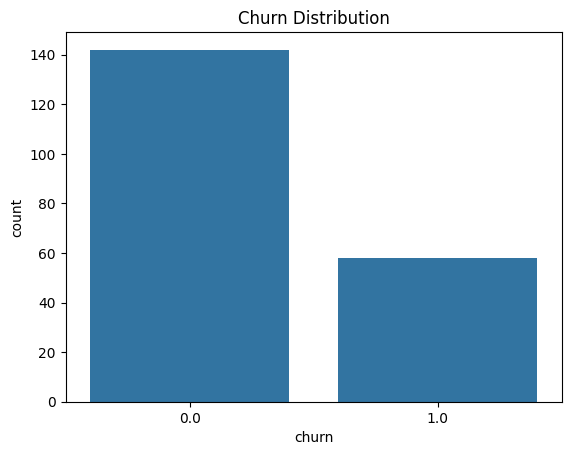

In [6]:
sns.countplot(x="churn", data=df)
plt.title("Churn Distribution")
plt.show()

**Insight:**  
- Churn distribution is slightly imbalanced
- Stratified sampling is recommended during modeling

## 5️⃣ Univariate Analysis — Numerical Features

### 5.1 Distribution of Key Numerical Variables

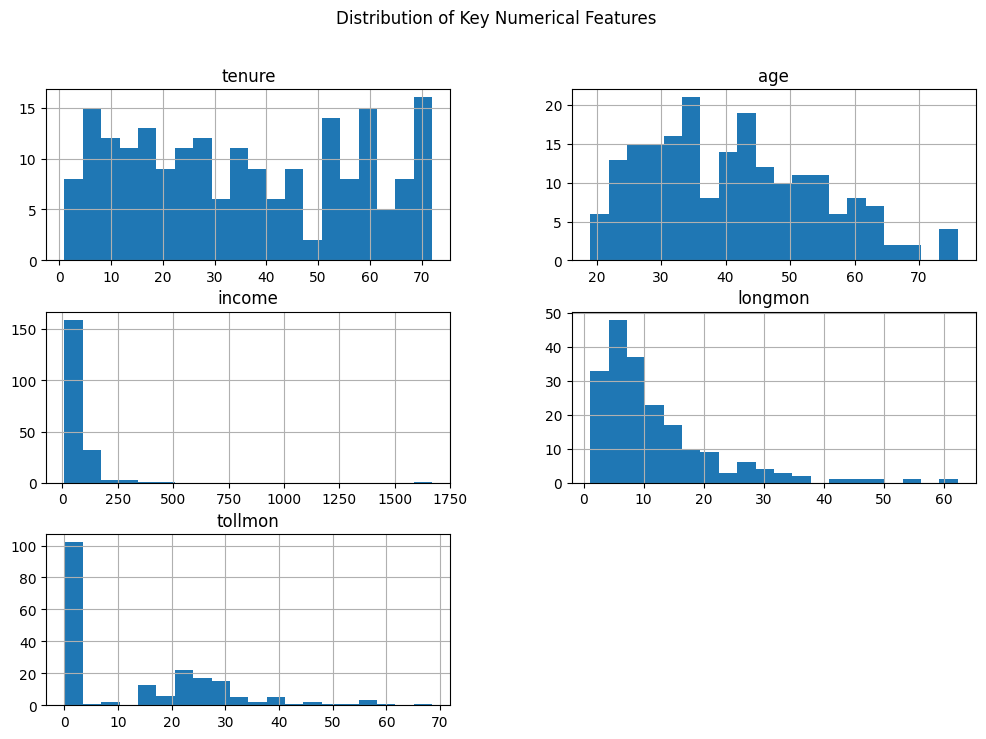

In [7]:
numeric_cols = [
    "tenure",
    "age",
    "income",
    "longmon",
    "tollmon"
]

df[numeric_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribution of Key Numerical Features")
plt.show()

**Insight:**  
- Tenure and income show skewed distributions
- Log-transformed features (`loglong`, `logtoll`, `lninc`) help normalize data

## 6️⃣ Churn vs Numerical Features

### 6.1 Tenure vs Churn

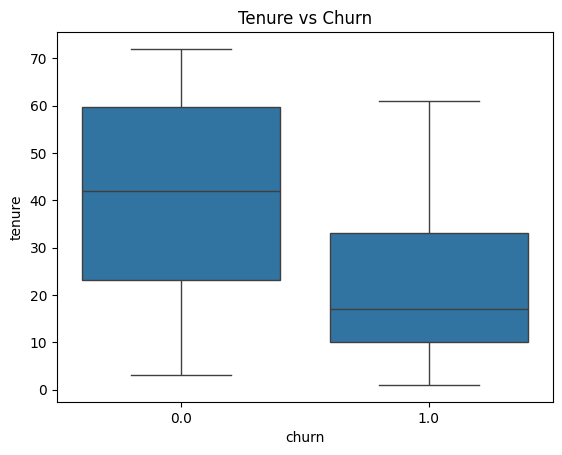

In [8]:
sns.boxplot(x="churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.show()

### 6.2 Monthly Charges vs Churn

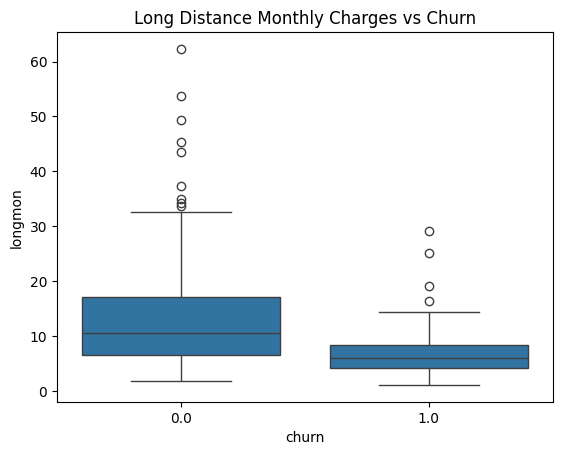

In [9]:
sns.boxplot(x="churn", y="longmon", data=df)
plt.title("Long Distance Monthly Charges vs Churn")
plt.show()

**Insight:**  
- Customers with **shorter tenure** tend to churn more
- Higher monthly usage is associated with churn risk

## 7️⃣ Correlation Analysis

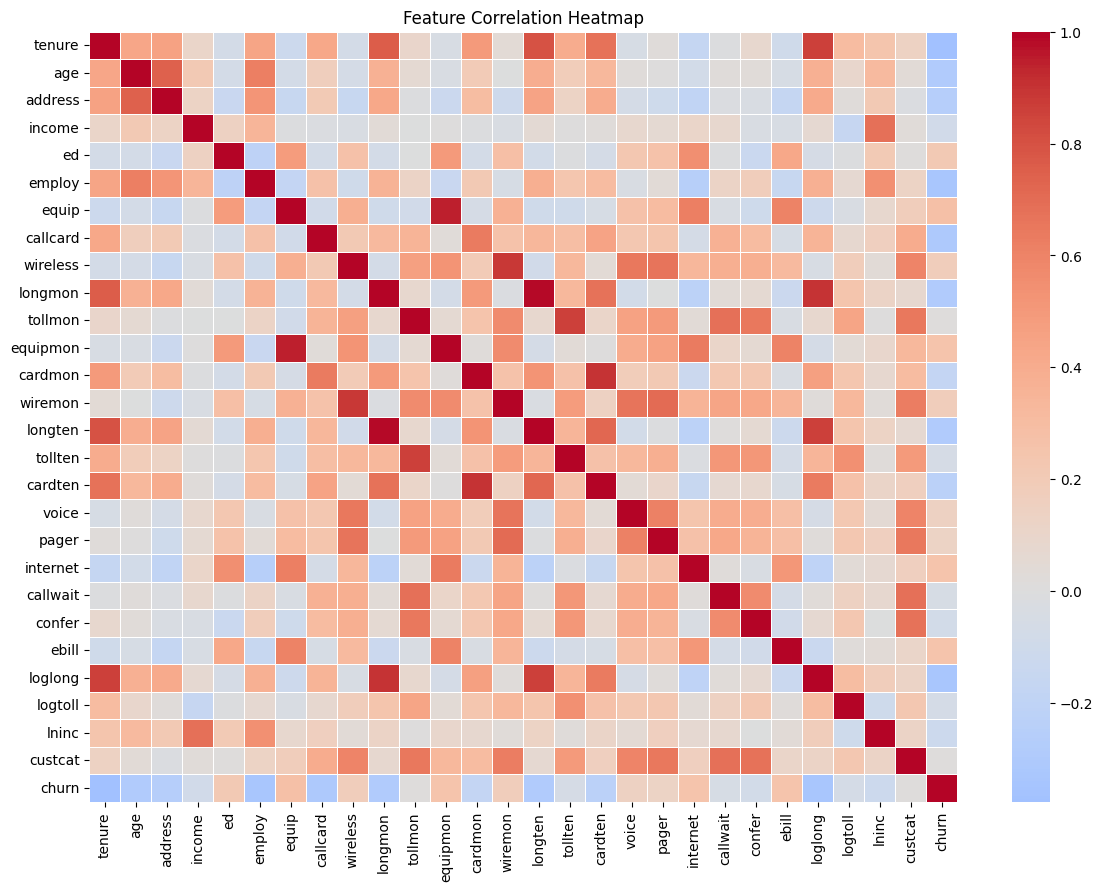

In [13]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    df.corr(),
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Feature Correlation Heatmap")
plt.show()

**Insight:**  
- Strong correlations exist between usage-based features
- Multicollinearity should be considered during modeling

## 8️⃣ Customer Segment Analysis

### 8.1 Customer Category vs Churn

In [ ]:
sns.countplot(x="custcat", hue="churn", data=df)
plt.title("Customer Category vs Churn")
plt.show()

**Insight:**  
Certain customer categories show higher churn rates,
suggesting potential segmentation strategies.

## 9️⃣ Key Insights Summary

- Shorter tenure customers are more likely to churn
- Usage-related features strongly influence churn behavior
- Customer segmentation provides meaningful churn patterns
- Feature scaling and regularization are important for modeling

## ✅ Conclusion & Next Steps

### EDA Summary
This exploratory analysis revealed important behavioral and usage-based
patterns associated with customer churn.

### Next Steps
- Feature selection based on EDA findings
- Model improvement using advanced algorithms
- Hyperparameter tuning and evaluation